# Загрузка данных / Data loading
Имеется набор данных катастрофы начала ХХ века Титаник, необходимо предсказать выживет ли пассажир

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
pd.options.display.min_rows=5500
np.set_printoptions(threshold=sys.maxsize)

df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
df_test = pd.merge(df_test, pd.read_csv('gender_submission.csv'), left_on='PassengerId', 
              right_on='PassengerId', how='left')

df_test = df_test.set_index('PassengerId')

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [8]:
df = pd.concat([df_train, df_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Исследование данных / Data exploration
Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more. Using interactive dashboards and point-and-click data exploration, users can better understand the bigger picture and get to insights faster.

Признаки:
 - Survived. Выжил в крушении (да\нет);
 - Pclass. Класс билета;
 - Sex. Пол пассажира;
 - Name. Имя пассажира; 
 - Age. Возраст пассажира;
 - SibSp. Количество родственников;
 - Parch. Количество близких родственников;
 - Ticket. Номер билета;
 - Fare. Тариф;
 - Cabin. Номер каюты;
 - Embarked. Имя порта (первая буква).

[0 1]


Survived
0    815
1    494
Name: count, dtype: int64

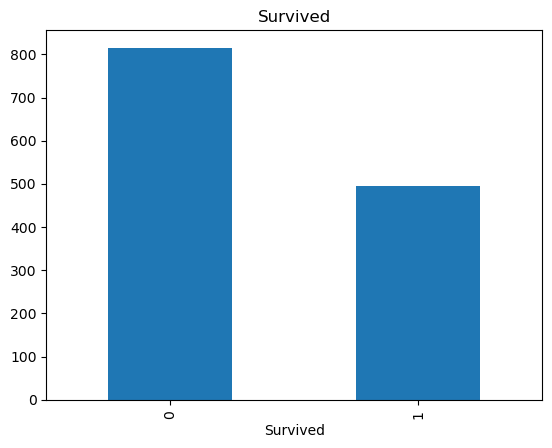

In [10]:
print(df['Survived'].unique())
display(df['Survived'].value_counts(dropna=False))

df['Survived'].value_counts(dropna=False).plot.bar(title='Survived')
plt.show()

[3 1 2]


Pclass
3    709
1    323
2    277
Name: count, dtype: int64

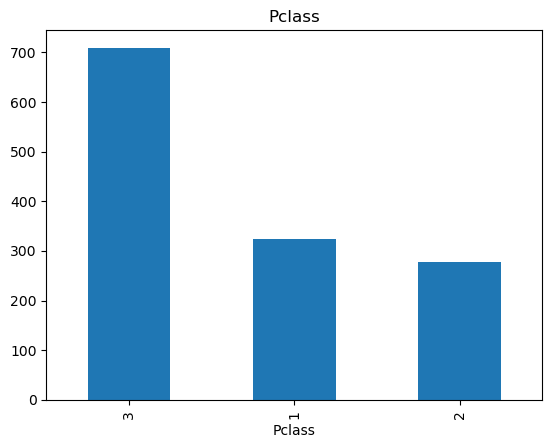

In [11]:
print(df['Pclass'].unique())
display(df['Pclass'].value_counts(dropna=False))

df['Pclass'].value_counts(dropna=False).plot.bar(title='Pclass')
plt.show()

['male' 'female']


Sex
male      843
female    466
Name: count, dtype: int64

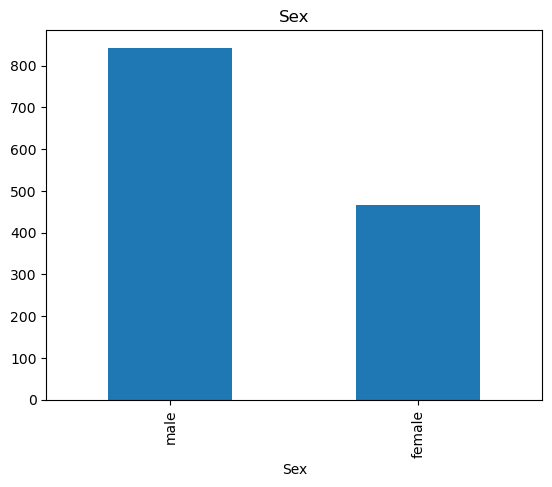

In [12]:
print(df['Sex'].unique())
display(df['Sex'].value_counts(dropna=False))

df['Sex'].value_counts(dropna=False).plot.bar(title='Sex')
plt.show()

In [13]:
# print(df['Name'].unique())
display(df['Name'].value_counts(dropna=False))

Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
Najib, Miss. Adele Kiamie "Jane"                       1
Abelson, Mrs. Samuel (Hannah Wizosky)                  1
Vander Cruyssen, Mr. Victor                            1
Carlsson, Mr. Frans Olof                               1
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1
Balkic, Mr. Cerin                                      1
Roebling, Mr. Washington Augustus II                   1
van Melkebeke, Mr. Philemon                            1
Duran y More, Miss. Asuncion                           1
Bystrom, Mrs. (Karolina)                               1
Gill, Mr. John William                                 1
Sage, Miss. Dorothy Edith "Dolly"                      1
Swift, Mrs. Frederick Joel

[0.83, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 11.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 38.0, nan, 0.17, 0.33, 0.42, 0.67, 0.75, 0.92, 1.0, 6.0, 9.0, 10.0, 11.5, 12.0, 13.0, 18.5, 20.5, 22.5, 23.5, 24.5, 26.5, 30.5, 32.5, 34.5, 36.0, 36.5, 37.0, 38.5, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 60.5, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 70.0, 70.5, 71.0, 74.0, 76.0, 80.0]


Age
NaN      263
24.00     47
22.00     43
21.00     41
30.00     40
18.00     39
25.00     34
28.00     32
36.00     31
26.00     30
27.00     30
29.00     30
19.00     29
23.00     26
32.00     24
35.00     23
20.00     23
31.00     23
33.00     21
45.00     21
17.00     20
39.00     20
16.00     19
40.00     18
42.00     18
34.00     16
50.00     15
47.00     14
38.00     14
48.00     14
        ... 
12.00      3
0.83       3
28.50      3
34.50      2
0.92       2
30.50      2
36.50      2
14.50      2
71.00      2
45.50      2
70.00      2
0.17       1
67.00      1
11.50      1
76.00      1
26.50      1
0.33       1
60.50      1
22.50      1
70.50      1
74.00      1
0.42       1
0.67       1
24.50      1
80.00      1
23.50      1
20.50      1
55.50      1
66.00      1
38.50      1
Name: count, Length: 99, dtype: int64

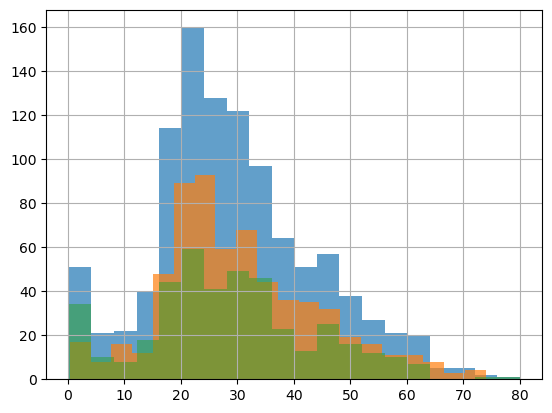

In [16]:
print(sorted(df['Age'].unique()))
display(df['Age'].value_counts(dropna=False))
df['Age'].hist(bins=20, alpha=.7)
df.loc[df.Survived==0, 'Age'].hist(bins=20, alpha=.7);
df.loc[df.Survived==1, 'Age'].hist(bins=20, alpha=.5);

In [13]:
df[df['Age']<1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S


[0, 1, 2, 3, 4, 5, 8]


SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

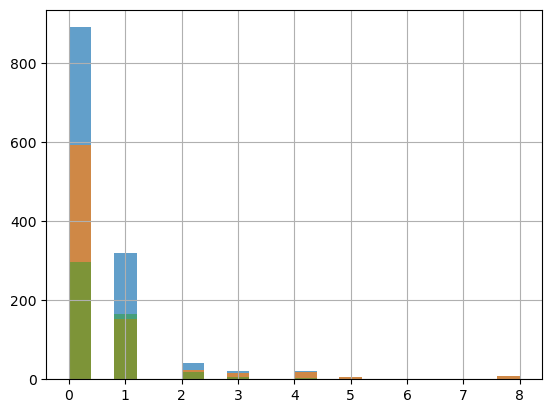

In [21]:
print(sorted(df['SibSp'].unique()))
display(df['SibSp'].value_counts(dropna=False))
df['SibSp'].hist(bins=20, alpha=.7)
df.loc[df.Survived==0, 'SibSp'].hist(bins=20, alpha=.7);
df.loc[df.Survived==1, 'SibSp'].hist(bins=20, alpha=.5);

[0, 1, 2, 3, 4, 5, 6, 9]


Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

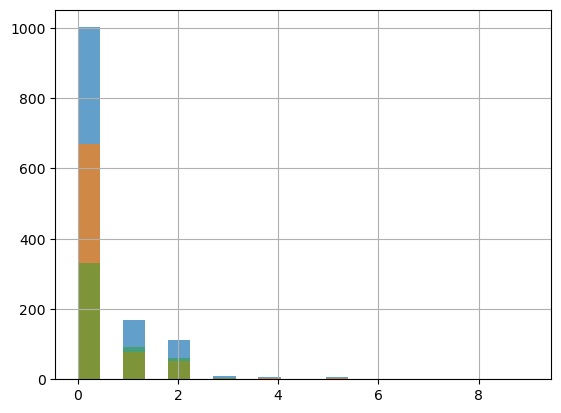

In [22]:
print(sorted(df['Parch'].unique()))
display(df['Parch'].value_counts(dropna=False))
df['Parch'].hist(bins=20, alpha=.7)
df.loc[df.Survived==0, 'Parch'].hist(bins=20, alpha=.7);
df.loc[df.Survived==1, 'Parch'].hist(bins=20, alpha=.5);

In [23]:
print(sorted(df['Ticket'].unique()))
display(df['Ticket'].value_counts(dropna=False))

['110152', '110413', '110465', '110469', '110489', '110564', '110813', '111163', '111240', '111320', '111361', '111369', '111426', '111427', '111428', '112050', '112051', '112052', '112053', '112058', '112059', '112277', '112377', '112378', '112379', '112901', '113028', '113038', '113043', '113044', '113050', '113051', '113054', '113055', '113056', '113059', '113501', '113503', '113505', '113509', '113510', '113514', '113572', '113760', '113767', '113773', '113776', '113778', '113780', '113781', '113783', '113784', '113786', '113787', '113788', '113789', '113790', '113791', '113792', '113794', '113795', '113796', '113798', '113800', '113801', '113803', '113804', '113806', '113807', '11668', '11751', '11752', '11753', '11755', '11765', '11767', '11769', '11770', '11771', '11774', '11778', '11813', '11967', '1222', '12233', '12460', '12749', '13049', '13050', '13213', '13214', '13236', '13502', '13507', '13508', '13509', '13567', '13568', '13695', '13905', '14311', '14312', '14313', '149

Ticket
CA. 2343              11
CA 2144                8
1601                   8
PC 17608               7
S.O.C. 14879           7
347077                 7
347082                 7
3101295                7
19950                  6
113781                 6
347088                 6
382652                 6
4133                   5
W./C. 6608             5
PC 17757               5
349909                 5
220845                 5
113503                 5
16966                  5
LINE                   4
C.A. 33112             4
PC 17755               4
C.A. 34651             4
12749                  4
PC 17760               4
230136                 4
SC/Paris 2123          4
W./C. 6607             4
PC 17483               4
2666                   4
                      ..
330909                 1
4135                   1
111427                 1
382651                 1
SOTON/OQ 3101316       1
PC 17473               1
350060                 1
7553                   1
65306             

[0.0, 3.1708, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.75, 6.8583, 6.95, 6.975, 7.0, 7.0458, 7.05, 7.0542, 7.125, 7.1417, 7.225, 7.2292, 7.25, 7.2833, 7.3125, 7.4958, 7.5208, 7.55, 7.575, 7.5792, 7.6292, 7.65, 7.7208, 7.725, 7.7292, 7.7333, 7.7375, 7.7417, 7.75, 7.775, 7.7792, 7.7875, 7.7958, 7.8, 7.8208, 7.8292, 7.85, 7.8542, 7.875, 7.8792, 7.8875, 7.8958, 7.925, 8.0292, 8.05, 8.1125, 8.1375, 8.1583, 8.3, 8.3625, 8.4042, 8.4333, 8.4583, 8.5167, 8.6542, 8.6625, 8.6833, 8.7125, 8.85, 8.9625, 9.0, 9.2167, 9.225, 9.325, 9.35, 9.475, 9.4833, 9.5, 9.5875, 9.6875, 9.825, 9.8375, 9.8417, 9.8458, 10.1708, 10.4625, 10.5, 10.5167, 10.7083, 11.1333, 11.2417, 11.5, 12.0, 12.1833, 12.275, 12.2875, 12.35, 12.475, 12.525, 12.65, 12.7375, 12.875, 13.0, 13.4167, 13.5, 13.775, 13.7917, 13.8583, 13.8625, 13.9, 14.0, 14.1083, 14.4, 14.4542, 14.4583, 14.5, 15.0, 15.0333, 15.0458, 15.05, 15.1, 15.2458, 15.5, 15.55, 15.5792, 15.7417, 15.75, 15.85, 15.9, 16.0, 16.1, 16.7, 17.4, 17.8, 18.0, 18.75, 18.7875,

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
7.2250     21
8.6625     21
7.8542     21
7.2500     18
0.0000     17
21.0000    14
9.5000     12
16.1000    12
14.5000    11
27.7208    11
69.5500    11
14.4542    10
7.8792     10
7.7958     10
15.5000    10
24.1500     9
7.0500      9
15.2458     9
52.0000     8
56.4958     8
           ..
6.8583      1
7.5208      1
7.0458      1
9.8375      1
13.7917     1
38.5000     1
7.8750      1
7.1417      1
9.4750      1
8.8500      1
8.1375      1
7.3125      1
8.6833      1
8.0292      1
8.3625      1
9.4833      1
7.7417      1
12.5250     1
10.1708     1
9.8417      1
40.1250     1
25.5875     1
8.4333      1
32.3208     1
9.2167      1
26.2833     1
14.0000     1
15.0000     1
6.2375      1
7.7208      1
Name: count, Length: 282, dtype: int64

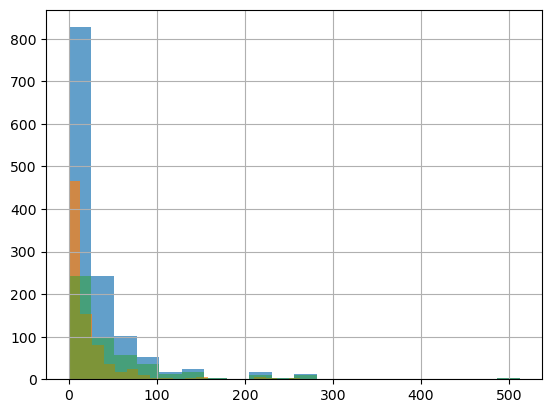

In [24]:
print(sorted(df['Fare'].unique()))
display(df['Fare'].value_counts(dropna=False))
df['Fare'].hist(bins=20, alpha=.7)
df.loc[df.Survived==0, 'Fare'].hist(bins=20, alpha=.7);
df.loc[df.Survived==1, 'Fare'].hist(bins=20, alpha=.5);

In [25]:
print(df['Cabin'].unique())
display(df['Cabin'].value_counts(dropna=False))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34' 'A9' 'C31' 'B61' 'C5

Cabin
NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
D                     4
C78                   4
B96 B98               4
F4                    4
F2                    4
C22 C26               4
E34                   3
B51 B53 B55           3
E101                  3
A34                   3
C101                  3
B58 B60               3
C7                    2
C55 C57               2
E8                    2
C62 C64               2
E50                   2
B35                   2
D37                   2
E24                   2
C116                  2
E121                  2
C124                  2
C65                   2
C6                    2
                   ... 
E10                   1
C104                  1
A10                   1
C45                   1
C90                   1
D49                   1
E58                   1
D48                   1
A26                   1
B50                   1
A23       

['S' 'C' 'Q' nan]


Embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

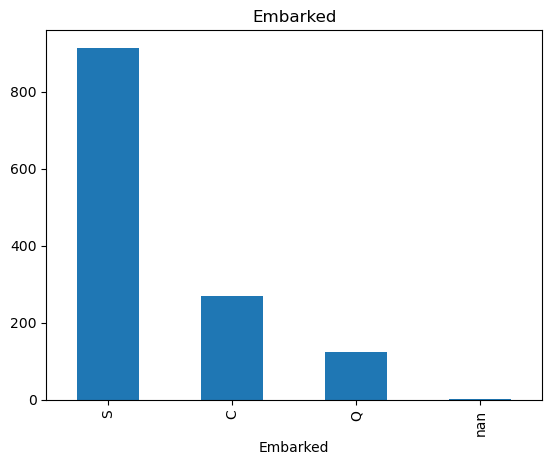

In [26]:
print(df['Embarked'].unique())
display(df['Embarked'].value_counts(dropna=False))

df['Embarked'].value_counts(dropna=False).plot.bar(title='Embarked')
plt.show()

# Чистка данных / Data cleaning
The main aim of Data Cleaning is to identify and remove errors & duplicate data, in order to create a reliable dataset. This improves the quality of the training data for analytics and enables accurate decision-making.

## Количественные / Quantitative

In [27]:
df_red = df.copy()

In [28]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [29]:
df_pivot = df.pivot_table(index = ['Sex', 'Pclass'], values = 'Age', aggfunc=['mean', 'median'])
df_pivot

mean median
                     Age    Age
Sex    Pclass                  
female 1       37.037594   36.0
       2       27.499223   28.0
       3       22.185329   22.0
male   1       41.029272   42.0
       2       30.815380   29.5
       3       25.962264   25.0

In [30]:
def age_fill(row):
    if pd.isna(row.Age) == True:
        if row.Sex == 'female' and row.Pclass == 1:
            return df.query("Sex=='female' and Pclass==1")['Age'].mean()
        elif row.Sex == 'female' and row.Pclass == 2:
            return df.query("Sex=='female' and Pclass==2")['Age'].mean()
        elif row.Sex == 'female' and row.Pclass == 3:
            return df.query("Sex=='female' and Pclass==3")['Age'].mean()
        elif row.Sex == 'male' and row.Pclass == 1:
            return df.query("Sex=='male' and Pclass==1")['Age'].mean()
        elif row.Sex == 'male' and row.Pclass == 2:
            return df.query("Sex=='male' and Pclass==2")['Age'].mean()
        else:
            return df.query("Sex=='male' and Pclass==3")['Age'].mean()
    else:
        return row.Age

In [31]:
df_red['Age_new'] = df_red.apply(age_fill, axis=1)
df_red['Age_new'] = df_red['Age_new'].astype('int')

In [32]:
df_red['Age'].fillna(df_red.Age.mean(), inplace = True)
df_red['Age'] = df_red['Age'].astype('int')

[22 38 26 35 25 54  2 27 14  4 58 20 39 55 30 31 34 15 28  8 19 40 37 66
 42 21 18  3  7 49 29 65 41  5 11 45 17 32 16  0 33 23 24 46 59 71 47 70
 12  9 36 51 44  1 61 56 50 62 52 63 43 60 10 64 13 48 53 57 80  6 74 67
 76]


<Axes: >

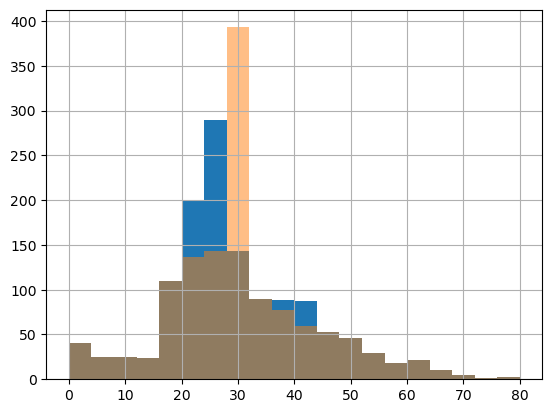

In [33]:
print(df_red['Age_new'].unique())
df_red['Age_new'].hist(bins=20)
df_red['Age'].hist(bins=20, alpha=0.5)

In [34]:
df_red[df_red['Fare']>400]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C,35
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,36
738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,35
1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C,58


In [35]:
df_red['Fare'].fillna(df_red['Fare'].median(), inplace = True)
df_red['Fare'] = df_red['Fare'].astype('int')

In [36]:
df_red.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_new
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.685256,0.498854,0.385027,32.854851,29.232238
std,0.484918,0.837836,12.899824,1.041658,0.865560,51.749872,13.214399
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000,22.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000,26.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,37.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.000000,80.000000


## Категориальные / Category

In [37]:
df_red.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [38]:
last_name = df_red.Name.apply(lambda x : x.split(',')[0])
df_red.insert(3, 'Last_name', last_name)

In [39]:
df_red['Title'] = df_red['Name'].str.extract(', (\w*)\.', expand=True)

In [130]:
df_red['Title'].value_counts(dropna=False)

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       13
Rev         8
Dr          8
Name: count, dtype: int64

In [41]:
df_red['Title'] = df_red['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df_red['Title'] = df_red['Title'].replace([np.nan, 'Don', 'Col', 'Major', 'Lady', 'Sir', 'Capt', 'Jonkheer', 'Dona'], 'Rare')

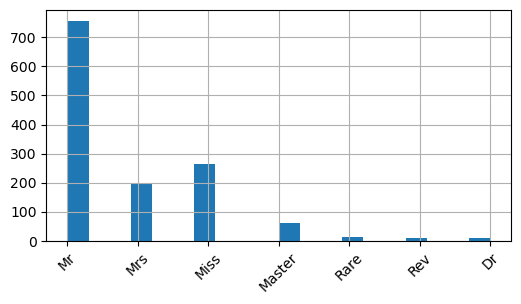

In [42]:
df_red['Title'].hist(xrot=45, figsize=(6, 3), bins=20); 

In [43]:
df_red['Ticket'].value_counts(dropna=False)

Ticket
CA. 2343              11
CA 2144                8
1601                   8
PC 17608               7
S.O.C. 14879           7
347077                 7
347082                 7
3101295                7
19950                  6
113781                 6
347088                 6
382652                 6
4133                   5
W./C. 6608             5
PC 17757               5
349909                 5
220845                 5
113503                 5
16966                  5
LINE                   4
C.A. 33112             4
PC 17755               4
C.A. 34651             4
12749                  4
PC 17760               4
230136                 4
SC/Paris 2123          4
W./C. 6607             4
PC 17483               4
2666                   4
                      ..
330909                 1
4135                   1
111427                 1
382651                 1
SOTON/OQ 3101316       1
PC 17473               1
350060                 1
7553                   1
65306             

In [44]:
ticket_number = df_red['Ticket'].apply(lambda x : x.split(' ')[-1])
df_red.insert(9, 'Ticket_number', ticket_number)

In [48]:
#df_red.Ticket.unique()
#df_red['Ticket_number'].value_counts(dropna=False)

Ticket_number
2343       11
1601        8
2144        8
17608       7
14879       7
3101295     7
347077      7
347082      7
382652      6
347088      6
19950       6
113781      6
220845      5
4133        5
16966       5
6608        5
17757       5
349909      5
113503      5
17483       4
6607        4
LINE        4
2666        4
12749       4
34651       4
2123        4
17755       4
33112       4
17760       4
230136      4
           ..
315086      1
364846      1
330909      1
4135        1
111427      1
382651      1
7553        1
315089      1
347076      1
323592      1
230434      1
65306       1
113794      1
113786      1
65303       1
113051      1
2817        1
349240      1
13509       1
13531       1
371060      1
19952       1
364506      1
111320      1
234360      1
2816        1
3101306     1
113792      1
36209       1
359309      1
Name: count, Length: 924, dtype: int64

In [49]:
df_red['Ticket'] = df_red['Ticket'].str.extract('^(.*) \d*$', expand=True)

In [50]:
df_red['Ticket'].value_counts(dropna=False)

Ticket
NaN            961
PC              92
C.A.            46
SOTON/O.Q.      16
STON/O 2.       14
W./C.           14
CA.             12
A/5             12
SC/PARIS        11
A/5.            10
CA              10
F.C.C.           9
SOTON/OQ         8
C                8
S.O.C.           7
STON/O2.         7
S.O./P.P.        7
A/4              6
SC/Paris         5
PP               4
SC/AH            4
A.5.             3
SOTON/O2         3
S.C./PARIS       3
F.C.             3
A/4.             3
A./5.            3
SC               2
P/PP             2
WE/P             2
W.E.P.           2
C.A./SOTON       1
SC/A.3           1
STON/OQ.         1
AQ/4             1
A. 2.            1
LP               1
SC/A4            1
Fa               1
S.W./PP          1
SC/AH Basle      1
A/S              1
SCO/W            1
SW/PP            1
W/C              1
S.O.P.           1
A4.              1
SO/C             1
S.P.             1
S.C./A.4.        1
AQ/3.            1
Name: count, dtype: int6

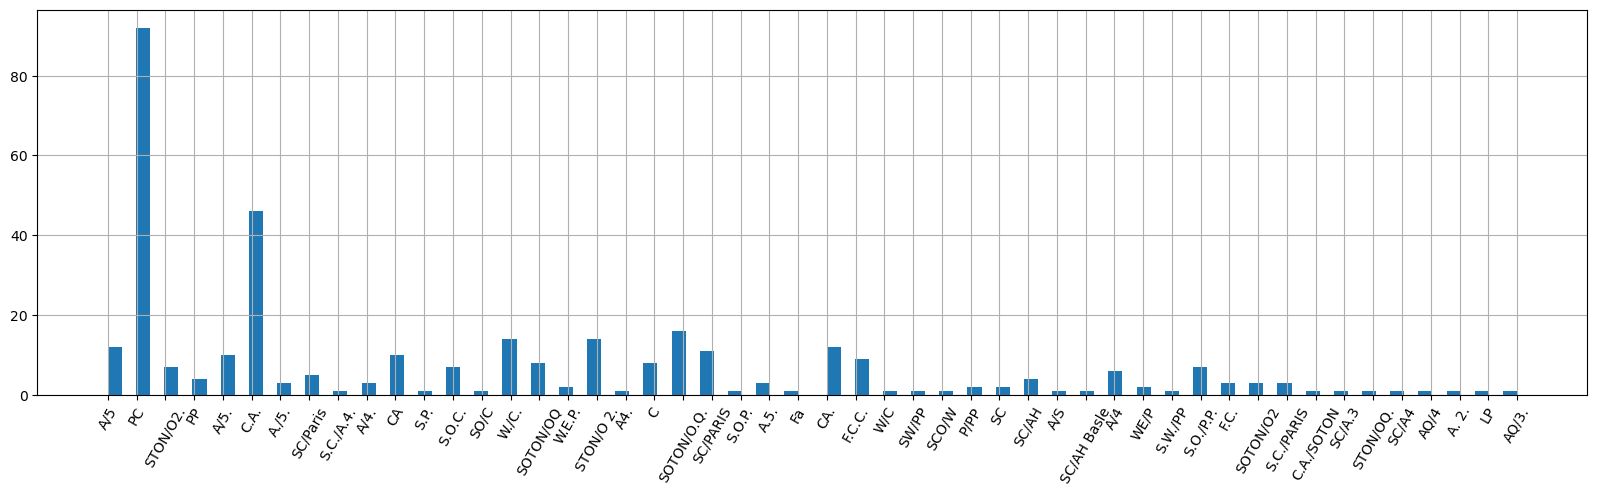

In [51]:
df_red['Ticket'].hist(xrot=60, figsize=(20, 5), bins=100); 

In [52]:
df_red['Ticket'].fillna('Empty', inplace = True)

In [53]:
t = df_red['Ticket'].value_counts(normalize=True).cumsum()

In [54]:
df_red.loc[~df_red['Ticket'].isin(t[t<.90].index), 'Ticket'] = 'Rare'

In [55]:
df_red.groupby(['Ticket', 'Survived']).Sex.count()

Ticket      Survived
A/5         0            11
            1             1
C.A.        0            26
            1            20
CA.         0             9
            1             3
Empty       0           603
            1           358
PC          0            36
            1            56
Rare        0            90
            1            41
SC/PARIS    0             7
            1             4
SOTON/O.Q.  0            13
            1             3
STON/O 2.   0             9
            1             5
W./C.       0            11
            1             3
Name: Sex, dtype: int64

In [56]:
df_red['Cabin'].value_counts(dropna=False)

Cabin
NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
D                     4
C78                   4
B96 B98               4
F4                    4
F2                    4
C22 C26               4
E34                   3
B51 B53 B55           3
E101                  3
A34                   3
C101                  3
B58 B60               3
C7                    2
C55 C57               2
E8                    2
C62 C64               2
E50                   2
B35                   2
D37                   2
E24                   2
C116                  2
E121                  2
C124                  2
C65                   2
C6                    2
                   ... 
E10                   1
C104                  1
A10                   1
C45                   1
C90                   1
D49                   1
E58                   1
D48                   1
A26                   1
B50                   1
A23       

In [59]:
df_red['Cabin'] = df_red['Cabin'].str.extract('^(\w)', expand=True).fillna('Empty')
df_red['Cabin'].value_counts(dropna=False)

Cabin
E    1055
C      94
B      65
D      46
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [61]:
df_red['Embarked'].fillna(df_red['Embarked'].mode()[0], inplace = True)
df_red['Embarked'].value_counts(dropna=False)

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [62]:
df_red.describe(include='O')

,Name,Last_name,Sex,Ticket,Ticket_number,Cabin,Embarked,Title
count,1309,1309,1309,1309,1309,1309,1309,1309
unique,1307,875,2,10,924,8,3,7
top,"Connolly, Miss. Kate",Andersson,male,Empty,2343,E,S,Mr
freq,2,11,843,961,11,1055,916,757


## Данные без пропусков

In [63]:
print('Всего спаслось', len(df_red[df_red['Survived']==1])/len(df_red)*100)
df_survived = df_red[df_red['Survived']==1]

Всего спаслось 37.73873185637891


In [64]:
print('женщин', len(df_survived[df_survived['Sex']=='female'])/len(df_survived)*100)
print('1 класс', len(df_survived[df_survived['Pclass']==1])/len(df_survived)*100)
print('2 класс', len(df_survived[df_survived['Pclass']==2])/len(df_survived)*100)
print('3 класс', len(df_survived[df_survived['Pclass']==3])/len(df_survived)*100)
print('детей', len(df_survived[df_survived['Age']<=10])/len(df_survived)*100)

женщин 77.93522267206477
1 класс 37.65182186234818
2 класс 23.684210526315788
3 класс 38.663967611336034
детей 9.7165991902834


In [65]:
print('женщин', len(df_survived[df_survived['Sex']=='female'])/len(df_red[df_red['Sex']=='female'])*100)
print('мужчин', len(df_survived[df_survived['Sex']=='male'])/len(df_red[df_red['Sex']=='male'])*100)
print('1 класс', len(df_survived[df_survived['Pclass']==1])/len(df_red[df_red['Pclass']==1])*100)
print('2 класс', len(df_survived[df_survived['Pclass']==2])/len(df_red[df_red['Pclass']==2])*100)
print('3 класс', len(df_survived[df_survived['Pclass']==3])/len(df_red[df_red['Pclass']==3])*100)
print('детей', len(df_survived[df_survived['Age']<=10])/len(df_red[df_red['Age']<=10])*100)

женщин 82.61802575107296
мужчин 12.930011862396205
1 класс 57.585139318885446
2 класс 42.238267148014444
3 класс 26.939351198871652
детей 55.81395348837209


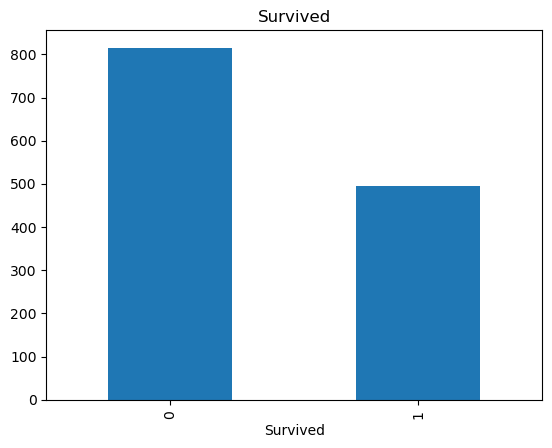

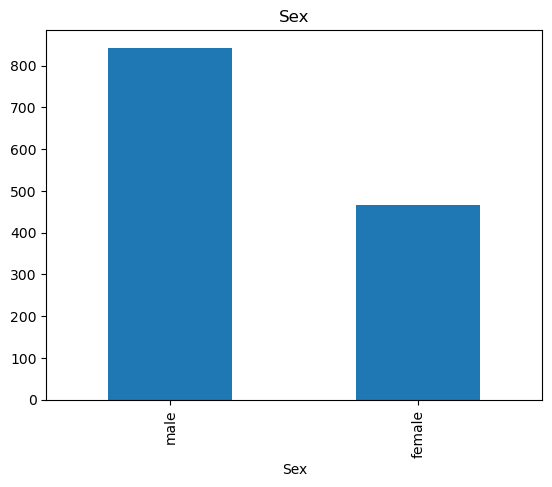

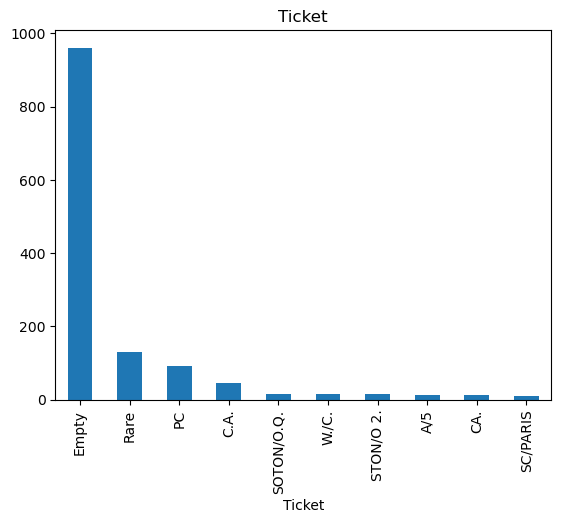

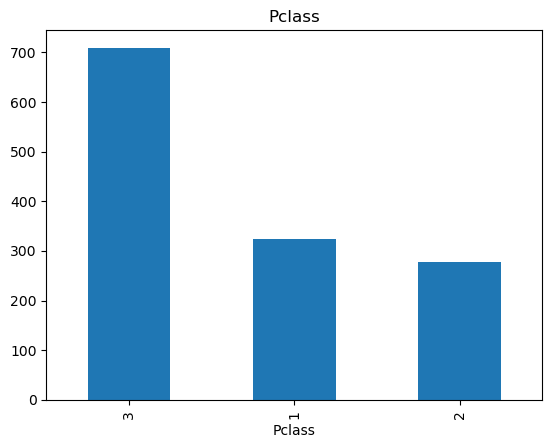

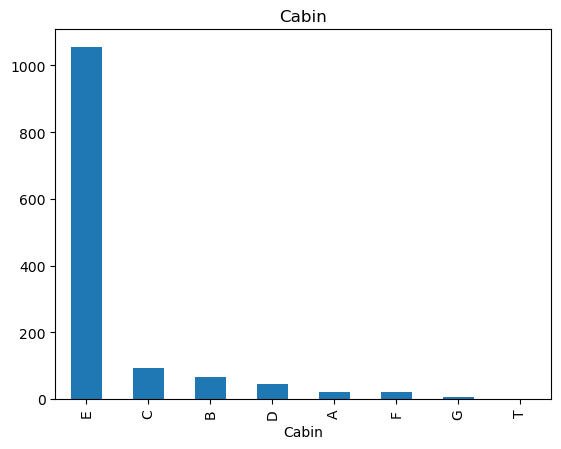

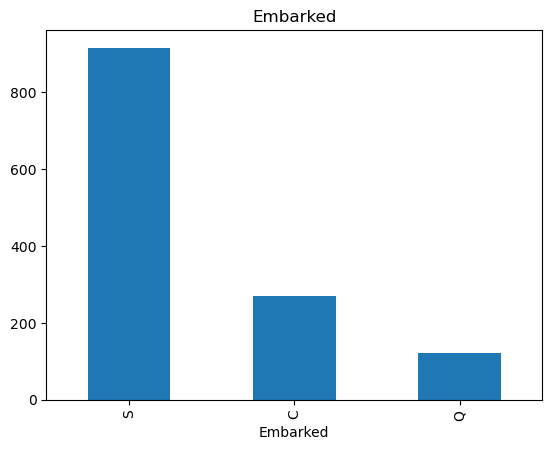

In [66]:
for col in df_red[['Survived', 'Sex', 'Ticket', 'Pclass', 'Cabin', 'Embarked']]:
    df_red[col].value_counts().plot.bar(title=col)
    plt.show()

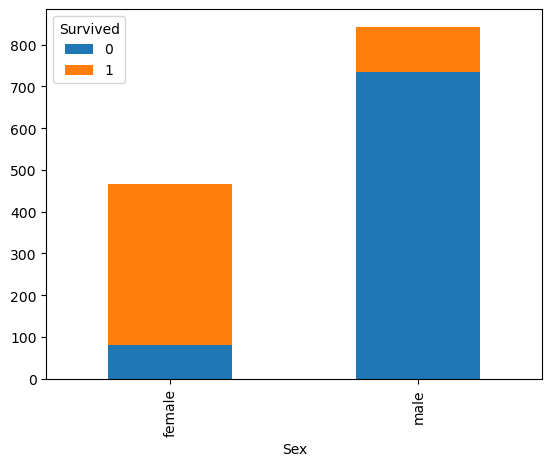

In [67]:
df_red.groupby('Sex').Survived.value_counts().unstack().plot.bar(stacked=True);

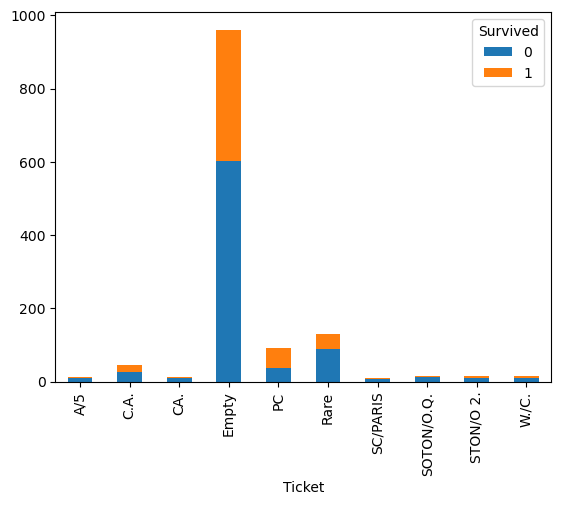

In [68]:
df_red.groupby('Ticket').Survived.value_counts().unstack().plot.bar(stacked=True);

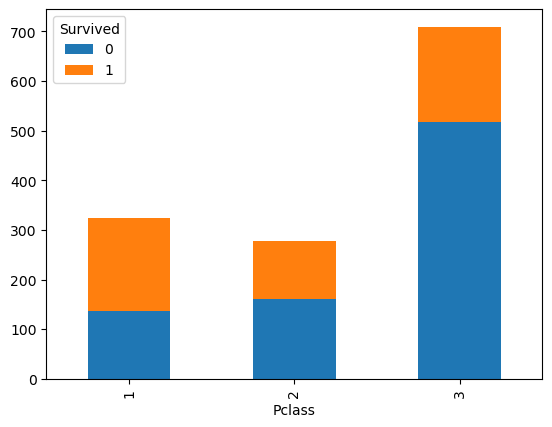

In [69]:
df_red.groupby('Pclass').Survived.value_counts().unstack().plot.bar(stacked=True);

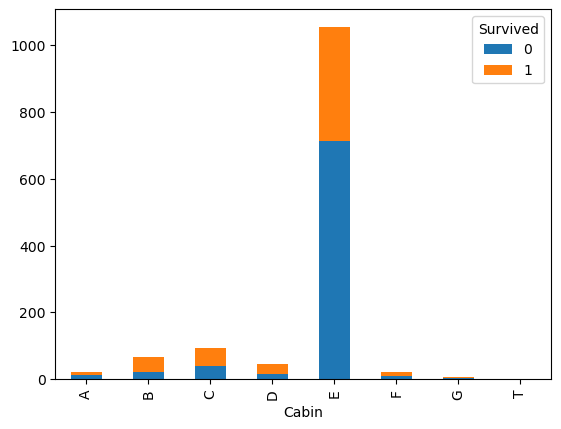

In [70]:
df_red.groupby('Cabin').Survived.value_counts().unstack().plot.bar(stacked=True);

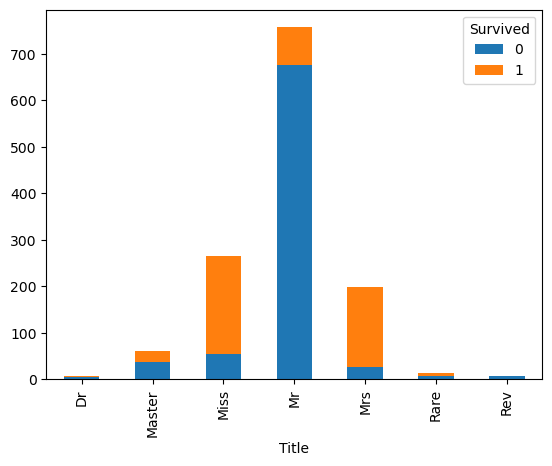

In [71]:
df_red.groupby(['Title', 'Survived']).Sex.count().unstack().plot.bar(stacked=True);

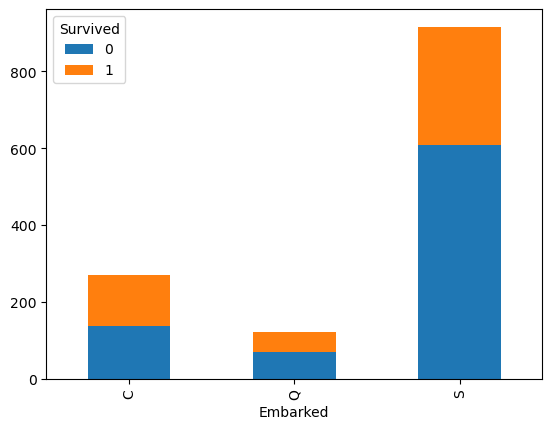

In [72]:
df_red.groupby('Embarked').Survived.value_counts().unstack().plot.bar(stacked=True);

## Бинарные / Binary

In [75]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Survived       1309 non-null   int64 
 1   Pclass         1309 non-null   int64 
 2   Name           1309 non-null   object
 3   Last_name      1309 non-null   object
 4   Sex            1309 non-null   object
 5   Age            1309 non-null   int64 
 6   SibSp          1309 non-null   int64 
 7   Parch          1309 non-null   int64 
 8   Ticket         1309 non-null   object
 9   Ticket_number  1309 non-null   object
 10  Fare           1309 non-null   int64 
 11  Cabin          1309 non-null   object
 12  Embarked       1309 non-null   object
 13  Age_new        1309 non-null   int64 
 14  Title          1309 non-null   object
dtypes: int64(7), object(8)
memory usage: 163.6+ KB


In [73]:
df_red.head()

,Survived,Pclass,Name,Last_name,Sex,Age,SibSp,Parch,Ticket,Ticket_number,Fare,Cabin,Embarked,Age_new,Title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Braund,male,22,1,0,A/5,21171,7,E,S,22,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38,1,0,PC,17599,71,C,C,38,Mrs
3,1,3,"Heikkinen, Miss. Laina",Heikkinen,female,26,0,0,Rare,3101282,7,E,S,26,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35,1,0,Empty,113803,53,C,S,35,Mrs
5,0,3,"Allen, Mr. William Henry",Allen,male,35,0,0,Empty,373450,8,E,S,35,Mr


In [76]:
df_transformed = df_red.drop(['Name', 'Last_name', 'Ticket_number'], axis=1).copy()

binary_features = ['Sex']
mapping = {'male': True, 'female': False}

df_transformed.loc[:, binary_features] = df_transformed.loc[:, binary_features].applymap(lambda x: mapping[x])

df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  1309 non-null   int64 
 1   Pclass    1309 non-null   int64 
 2   Sex       1309 non-null   object
 3   Age       1309 non-null   int64 
 4   SibSp     1309 non-null   int64 
 5   Parch     1309 non-null   int64 
 6   Ticket    1309 non-null   object
 7   Fare      1309 non-null   int64 
 8   Cabin     1309 non-null   object
 9   Embarked  1309 non-null   object
 10  Age_new   1309 non-null   int64 
 11  Title     1309 non-null   object
dtypes: int64(7), object(5)
memory usage: 132.9+ KB


In [77]:
df_transformed['Sex'] = df_transformed['Sex'].astype('bool')

In [78]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  1309 non-null   int64 
 1   Pclass    1309 non-null   int64 
 2   Sex       1309 non-null   bool  
 3   Age       1309 non-null   int64 
 4   SibSp     1309 non-null   int64 
 5   Parch     1309 non-null   int64 
 6   Ticket    1309 non-null   object
 7   Fare      1309 non-null   int64 
 8   Cabin     1309 non-null   object
 9   Embarked  1309 non-null   object
 10  Age_new   1309 non-null   int64 
 11  Title     1309 non-null   object
dtypes: bool(1), int64(7), object(4)
memory usage: 124.0+ KB


In [79]:
df_transformed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new,Title
PassengerId,,,,,,,,,,,,
1,0,3,True,22,1,0,A/5,7,E,S,22,Mr
2,1,1,False,38,1,0,PC,71,C,C,38,Mrs
3,1,3,False,26,0,0,Rare,7,E,S,26,Miss
4,1,1,False,35,1,0,Empty,53,C,S,35,Mrs
5,0,3,True,35,0,0,Empty,8,E,S,35,Mr


## One-hoting

In [80]:
df_one_hoted = df_transformed.copy()

In [81]:
ONE_HOT_COL = ['Ticket', 'Cabin', 'Embarked', 'Title']

temp = pd.get_dummies(df_one_hoted[ONE_HOT_COL], prefix=ONE_HOT_COL, dtype=bool, drop_first=True)

df_one_hoted = pd.concat([temp, df_one_hoted.select_dtypes('number'), 
                            df_one_hoted.select_dtypes('bool')], axis=1)

df_transformed.shape, df_one_hoted.shape

((1309, 12), (1309, 32))

In [82]:
df_one_hoted.head()

,Ticket_C.A.,Ticket_CA.,Ticket_Empty,Ticket_PC,Ticket_Rare,Ticket_SC/PARIS,Ticket_SOTON/O.Q.,Ticket_STON/O 2.,Ticket_W./C.,Cabin_B,...,Title_Rare,Title_Rev,Survived,Pclass,Age,SibSp,Parch,Fare,Age_new,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,0,3,22,1,0,7,22,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,1,1,38,1,0,71,38,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,1,3,26,0,0,7,26,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,1,1,35,1,0,53,35,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,0,3,35,0,0,8,35,True


## Ordinal Encoding

In [83]:
df_transformed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new,Title
PassengerId,,,,,,,,,,,,
1,0,3,True,22,1,0,A/5,7,E,S,22,Mr
2,1,1,False,38,1,0,PC,71,C,C,38,Mrs
3,1,3,False,26,0,0,Rare,7,E,S,26,Miss
4,1,1,False,35,1,0,Empty,53,C,S,35,Mrs
5,0,3,True,35,0,0,Empty,8,E,S,35,Mr


In [84]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
encoder = OrdinalEncoder()
df_ordinal = df_transformed.reset_index(drop=True).copy()
ordinal = pd.DataFrame(encoder.fit_transform(df_ordinal[ONE_HOT_COL]), columns=df_ordinal[ONE_HOT_COL].columns)
df_ordinal = pd.concat([ordinal, df_ordinal.select_dtypes('number'), df_ordinal.select_dtypes('bool')], axis=1)

In [86]:
df_transformed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new,Title
PassengerId,,,,,,,,,,,,
1,0,3,True,22,1,0,A/5,7,E,S,22,Mr
2,1,1,False,38,1,0,PC,71,C,C,38,Mrs
3,1,3,False,26,0,0,Rare,7,E,S,26,Miss
4,1,1,False,35,1,0,Empty,53,C,S,35,Mrs
5,0,3,True,35,0,0,Empty,8,E,S,35,Mr


In [87]:
df_ordinal.head()

,Ticket,Cabin,Embarked,Title,Survived,Pclass,Age,SibSp,Parch,Fare,Age_new,Sex
0,0.0,4.0,2.0,3.0,0,3,22,1,0,7,22,True
1,4.0,2.0,0.0,4.0,1,1,38,1,0,71,38,False
2,5.0,4.0,2.0,2.0,1,3,26,0,0,7,26,False
3,3.0,2.0,2.0,4.0,1,1,35,1,0,53,35,False
4,3.0,4.0,2.0,3.0,0,3,35,0,0,8,35,True


In [88]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    1309 non-null   float64
 1   Cabin     1309 non-null   float64
 2   Embarked  1309 non-null   float64
 3   Title     1309 non-null   float64
 4   Survived  1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Age       1309 non-null   int64  
 7   SibSp     1309 non-null   int64  
 8   Parch     1309 non-null   int64  
 9   Fare      1309 non-null   int64  
 10  Age_new   1309 non-null   int64  
 11  Sex       1309 non-null   bool   
dtypes: bool(1), float64(4), int64(7)
memory usage: 113.9 KB


# Кореляция 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_new
Survived,1.000000,-0.264710,-0.688371,-0.045773,0.002370,0.108919,0.233817,-0.044351
Pclass,-0.264710,1.000000,0.124617,-0.372115,0.060832,0.018322,-0.559650,-0.451171
Sex,-0.688371,0.124617,1.000000,0.055101,-0.109609,-0.213125,-0.185599,0.072498
Age,-0.045773,-0.372115,0.055101,1.000000,-0.190345,-0.128821,0.174649,0.978017
SibSp,0.002370,0.060832,-0.109609,-0.190345,1.000000,0.373587,0.160374,-0.203430
Parch,0.108919,0.018322,-0.213125,-0.128821,0.373587,1.000000,0.221769,-0.134221
Fare,0.233817,-0.559650,-0.185599,0.174649,0.160374,0.221769,1.000000,0.199623
Age_new,-0.044351,-0.451171,0.072498,0.978017,-0.203430,-0.134221,0.199623,1.000000


<Axes: >

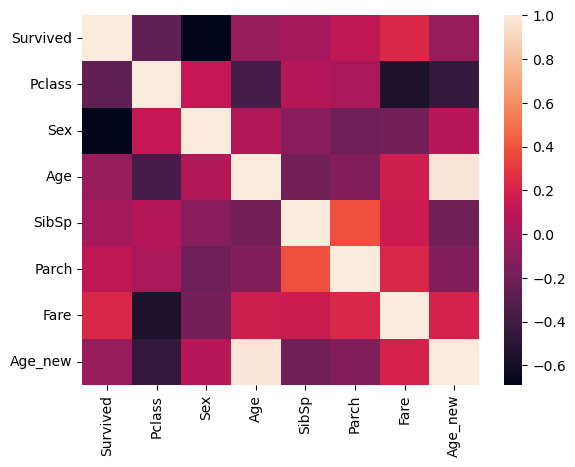

In [89]:
import seaborn as sns
display(df_transformed.drop(ONE_HOT_COL, axis=1).corr())
sns.heatmap(df_transformed.drop(ONE_HOT_COL, axis=1).corr())

# Нормализация / Normalization

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Layout
   .Histogram.Survived_before :Histogram   [x]   (Frequency)
   .Histogram.Survived_after  :Histogram   [x]   (Frequency)
   .Histogram.Pclass_before   :Histogram   [x]   (Frequency)
   .Histogram.Pclass_after    :Histogram   [x]   (Frequency)
   .Histogram.Age_before      :Histogram   [x]   (Frequency)
   .Histogram.Age_after       :Histogram   [x]   (Frequency)
   .Histogram.SibSp_before    :Histogram   [x]   (Frequency)
   .Histogram.SibSp_after     :Histogram   [x]   (Frequency)
   .Histogram.Parch_before    :Histogram   [x]   (Frequency)
   .Histogram.Parch_after     :Histogram   [x]   (Frequency)
   .Histogram.Fare_before     :Histogram   [x]   (Frequency)
   .Histogram.Fare_after      :Histogram   [x]   (Frequency)
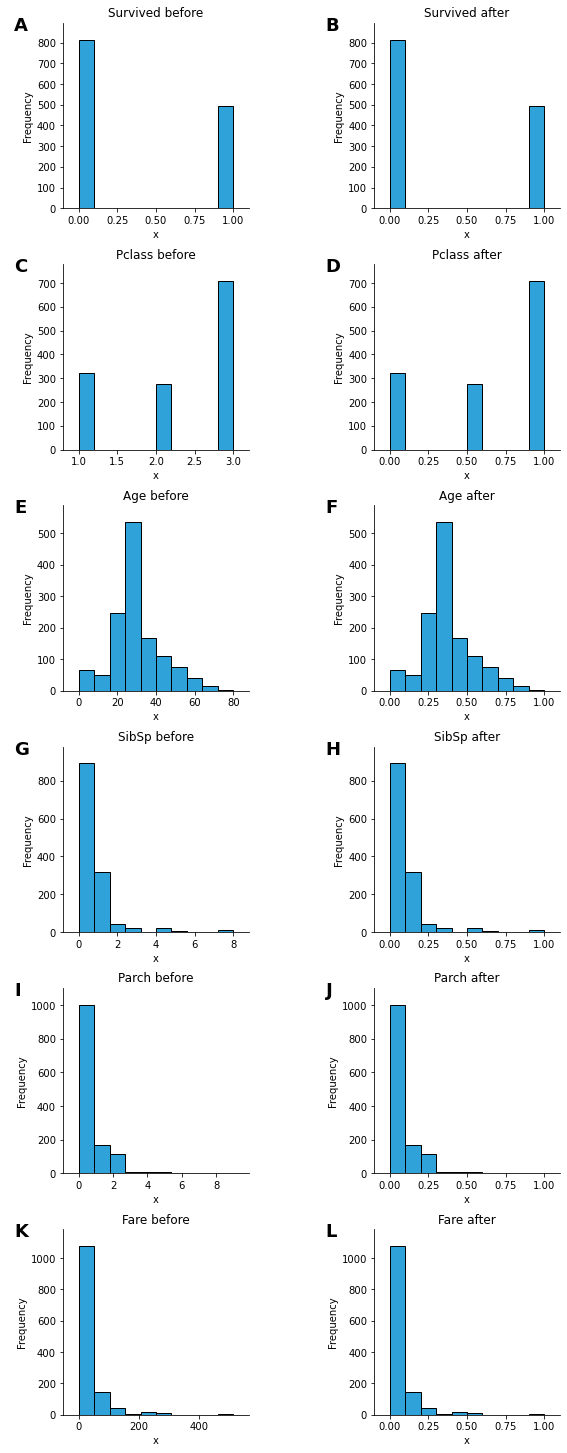

In [90]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import holoviews as hv
from holoviews import opts
from bokeh.palettes import Category10_3
from holoviews.operation import decimate
hv.extension('matplotlib')


df_normalized = df_one_hoted.copy()

scaler = MinMaxScaler()
df_normalized.loc[:, df_normalized.select_dtypes('number').columns] \
    = scaler.fit_transform(df_normalized.select_dtypes('number'))


hv.Layout(sum([[hv.Histogram(np.histogram(df_one_hoted[i]), label=i + ' before'), 
                hv.Histogram(np.histogram(df_normalized[i]), label= i + ' after')] 
               for i in df.iloc[:, :-1].select_dtypes('number').columns], [])).cols(2).opts(shared_axes=False)

# Создание модели / Model creation

## Логистическая регрессия

In [91]:
df_normalized.head()

,Ticket_C.A.,Ticket_CA.,Ticket_Empty,Ticket_PC,Ticket_Rare,Ticket_SC/PARIS,Ticket_SOTON/O.Q.,Ticket_STON/O 2.,Ticket_W./C.,Cabin_B,...,Title_Rare,Title_Rev,Survived,Pclass,Age,SibSp,Parch,Fare,Age_new,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,0,1.0,0.2750,0.125,0.0,0.013672,0.2750,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,1,0.0,0.4750,0.125,0.0,0.138672,0.4750,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,1,1.0,0.3250,0.000,0.0,0.013672,0.3250,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,1,0.0,0.4375,0.125,0.0,0.103516,0.4375,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,0,1.0,0.4375,0.000,0.0,0.015625,0.4375,True


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop(columns='Survived', axis=1), 
                                                    df_normalized['Survived'], test_size=0.2, random_state=2023)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1047, 31) (262, 31) (1047,) (262,)


In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(837, 31) (210, 31) (837,) (210,)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [95]:
model_log = LogisticRegression(max_iter=1000, random_state=2023, solver='liblinear', penalty='l1') # class_weight='balanced'
model_log.fit(X_train, y_train)

probabilities_valid = model_log.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print(probabilities_one_valid[:5])

[0.07328003 0.85751026 0.31934926 0.07192797 0.04678761]


In [104]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_valid, probabilities_one_valid)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
#plt.show()
plt.savefig("pr.png")

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) # < напишите код здесь >

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

#plt.show()
plt.savefig("roc.png")

In [107]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
print(auc_roc)

0.9076314786585366


In [108]:
for threshold in np.arange(0, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(y_valid, predicted_valid)
    recall = recall_score(y_valid, predicted_valid)
    f1 = f1_score(y_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1_мера = {:.3f}".format(threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.390, Полнота = 1.000, F1_мера = 0.562
Порог = 0.02 | Точность = 0.394, Полнота = 1.000, F1_мера = 0.566
Порог = 0.04 | Точность = 0.413, Полнота = 0.988, F1_мера = 0.583
Порог = 0.06 | Точность = 0.503, Полнота = 0.939, F1_мера = 0.655
Порог = 0.08 | Точность = 0.567, Полнота = 0.927, F1_мера = 0.704
Порог = 0.10 | Точность = 0.589, Полнота = 0.927, F1_мера = 0.720
Порог = 0.12 | Точность = 0.628, Полнота = 0.927, F1_мера = 0.749
Порог = 0.14 | Точность = 0.667, Полнота = 0.927, F1_мера = 0.776
Порог = 0.16 | Точность = 0.679, Полнота = 0.927, F1_мера = 0.784
Порог = 0.18 | Точность = 0.691, Полнота = 0.927, F1_мера = 0.792
Порог = 0.20 | Точность = 0.721, Полнота = 0.915, F1_мера = 0.806
Порог = 0.22 | Точность = 0.727, Полнота = 0.878, F1_мера = 0.796
Порог = 0.24 | Точность = 0.761, Полнота = 0.854, F1_мера = 0.805
Порог = 0.26 | Точность = 0.778, Полнота = 0.854, F1_мера = 0.814
Порог = 0.28 | Точность = 0.795, Полнота = 0.854, F1_мера = 0.824
Порог = 0.

In [109]:
def custom_predict_valid(X, threshold):
    probs = model_log.predict_proba(X_valid) 
    return (probs[:, 1] > threshold).astype(int)
     
new_preds_valid = custom_predict_valid(X=X_valid, threshold=0.48) 

In [110]:
print(accuracy_score(y_valid, new_preds_valid))
print(precision_score(y_valid, new_preds_valid))
print(recall_score(y_valid, new_preds_valid))
print(f1_score(y_valid, new_preds_valid))

0.9
0.8961038961038961
0.8414634146341463
0.8679245283018868


In [112]:
def custom_predict_test(X, threshold):
    probs = model_log.predict_proba(X_test) 
    return (probs[:, 1] > threshold).astype(int)
     
new_preds_test = custom_predict_test(X=X_test, threshold=0.48)

In [200]:
print(accuracy_score(y_test, new_preds_test))
print(precision_score(y_test, new_preds_test))
print(recall_score(y_test, new_preds_test))
print(f1_score(y_test, new_preds_test))

0.8587786259541985
0.8461538461538461
0.8073394495412844
0.8262910798122065


In [113]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_valid, new_preds_valid)[::-1, ::-1],
             index=['Actual positive', 'Actual negative'], 
             columns=['Pred positive', 'Pred negative'])

,Pred positive,Pred negative
Actual positive,69,13
Actual negative,8,120


In [114]:
pd.DataFrame(confusion_matrix(y_test, new_preds_test)[::-1, ::-1],
             index=['Actual positive', 'Actual negative'], 
             columns=['Pred positive', 'Pred negative'])

,Pred positive,Pred negative
Actual positive,88,21
Actual negative,17,136


In [115]:
lg_model = LogisticRegression(max_iter=1000, random_state=2023, solver='liblinear', penalty='l1')
lg_model.fit(X_train, y_train)

y_pred_train = lg_model.predict(X_train)
y_pred_test = lg_model.predict(X_test)

print(f'Accuracy train: {accuracy_score(y_train, y_pred_train)}, test: {accuracy_score(y_test, y_pred_test)}')
print(f'Precision train: {precision_score(y_train, y_pred_train)}, test: {precision_score(y_test, y_pred_test)}')
print(f'Recall train: {recall_score(y_train, y_pred_train)**0.5}, test: {recall_score(y_test, y_pred_test)**0.5}')
print(f'F1 train: {f1_score(y_train, y_pred_train)}, test: {f1_score(y_test, y_pred_test)}')

Accuracy train: 0.8661887694145759, test: 0.8625954198473282
Precision train: 0.8398576512455516, test: 0.8543689320388349
Recall train: 0.8825405870489916, test: 0.898520700674884
F1 train: 0.8082191780821917, test: 0.830188679245283


In [117]:
pd.DataFrame(confusion_matrix(y_test, y_pred_test)[::-1, ::-1],
             index=['Actual positive', 'Actual negative'], 
             columns=['Pred positive', 'Pred negative'])

,Pred positive,Pred negative
Actual positive,88,21
Actual negative,15,138


In [118]:
pd.DataFrame(model_log.coef_.reshape(-1, 1), index=X_test.columns).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,0
Ticket_C.A.,0.709020
Ticket_CA.,0.000000
Ticket_Empty,0.296064
Ticket_PC,0.000000
Ticket_Rare,0.000000
Ticket_SC/PARIS,0.000000
Ticket_SOTON/O.Q.,-0.318179
Ticket_STON/O 2.,2.541737
Ticket_W./C.,-0.137167
Cabin_B,0.000000
